## <a id='toc1_'></a>[Inaugural project](#toc0_)

**Table of contents**<a id='toc0_'></a>    
- [Imports](#toc1_)    
- [Model class](#toc2_)    
  -1. [Basic Edgeworth box](#toc2_1_)    
  -2. [The error in the market clearing condition](#toc2_1_)    
  -3. [The market clearing price](#toc2_1_)    
  -4a. [Allocation if P_1](#toc2_1_)    
  -4b. [Allocation if positive price](#toc2_1_)    
  -5a. [Allocation if C](#toc2_1_)    
  -5b. [Allocation no restrictions](#toc2_1_)    
  -6a. [Social planner allocation](#toc2_1_)  
  -6b. [Illustration of results](#toc2_1_)  
  -7-8. [A random set](#toc2_1_)     
<!-- vscode-jupyter-toc-config
	numbering=true
	anchor=true
	flat=false
	minLevel=2
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

## <a id='toc1_'></a>[Imports](#toc0_)

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from scipy import optimize
plt.rcParams.update({"axes.grid":True,"grid.color":"black","grid.alpha":"0.25","grid.linestyle":"--"})
plt.rcParams.update({'font.size': 14})

%load_ext autoreload
%autoreload 2

## 1. <a id='toc2_'></a>[Model class](#toc0_)

In [2]:
from ExchangeEconomy import ExchangeEconomyClass
import numpy as np

### 1. <a id='toc2_1_'></a>[Basic Edgeworth box](#toc0_)

In [3]:
model = ExchangeEconomyClass()

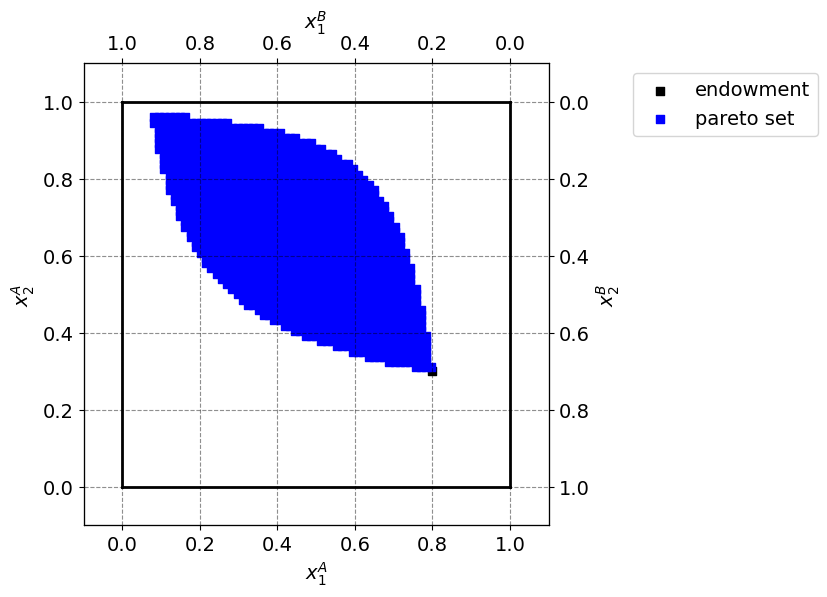

In [4]:
par = model.par
x1a_vec, x2a_vec = model.solve_discrete()

# a. total endowment
w1bar = 1.0
w2bar = 1.0

# b. figure set up
fig = plt.figure(frameon=False,figsize=(6,6), dpi=100)
ax_A = fig.add_subplot(1, 1, 1)

ax_A.set_xlabel("$x_1^A$")
ax_A.set_ylabel("$x_2^A$")

temp = ax_A.twinx()
temp.set_ylabel("$x_2^B$")
ax_B = temp.twiny()
ax_B.set_xlabel("$x_1^B$")
ax_B.invert_xaxis()
ax_B.invert_yaxis()

# A
ax_A.scatter(par.w1A,par.w2A,marker='s',color='black',label='endowment')

# Add pareto-optiaml point of person A

ax_A.scatter(x1a_vec,x2a_vec,marker='s', color='blue', label='pareto set')

# limits
ax_A.plot([0,w1bar],[0,0],lw=2,color='black')
ax_A.plot([0,w1bar],[w2bar,w2bar],lw=2,color='black')
ax_A.plot([0,0],[0,w2bar],lw=2,color='black')
ax_A.plot([w1bar,w1bar],[0,w2bar],lw=2,color='black')

ax_A.set_xlim([-0.1, w1bar + 0.1])
ax_A.set_ylim([-0.1, w2bar + 0.1])    
ax_B.set_xlim([w1bar + 0.1, -0.1])
ax_B.set_ylim([w2bar + 0.1, -0.1])

ax_A.legend(frameon=True,loc='upper right',bbox_to_anchor=(1.6,1.0));

The Edgeworth box illustrates the pairs of combinations of xA1 and xA2 that leave both players as least as
well off as they were when consuming their endowments. 

### 2. <a id='toc2_1_'></a>[The error in the market clearing condition](#toc0_)

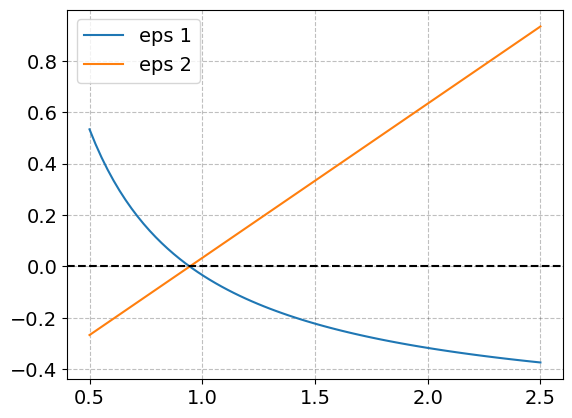

In [16]:
p1 = 0.5 + (2*np.arange(76)/75)

eps1_vec = []
eps2_vec = []

dicteps = {}

for p in p1:

    eps1, eps2 = model.check_market_clearing(p)

    eps1_vec.append(eps1)
    eps2_vec.append(eps2)

    dicteps[p] = (eps1, eps2)

df = pd.DataFrame(dicteps).T

df.columns = ['eps 1', 'eps 2']

df.plot()
plt.axhline(y=0, color='black', linestyle='--', label='y = 0')


We see here that the two errors intesect at exactly eps1 = eps2 = 0. This is where the market clears, and we see that this corresponds to a price of approximately 0.9.

### 3. <a id='toc2_3_'></a>[The market clearing price](#toc0_)

To solve for the market clearing price in the discrete set of prices, we loop over the absolute values of errors and find the price that minimizes this. Due to Walras' law we only need to find the market clearing price for one market, becsause if one market clears the other clears as well.

In [19]:
min_eps = float('inf')
min_p = None

for p, (eps1, eps2) in dicteps.items():
    abs_eps = abs(eps1)

    if abs_eps < min_eps:
        min_eps = abs_eps
        min_p = p


In [23]:
print(f'The market-clearing price is {min_p:.3f}')

The market-clearing price is 0.953


This validates what is illustrated in the graph in 2.2.

### 4a. <a id='toc2_4a_'></a>[Allocation if $P_1$](#toc0_)

As the price is restricted to be in $P_1$ we utilize a gridsearch over the possible prices to find the optimal allocation:

In [27]:
dict_ua = {}

max_ua = float(0)
p_ua = None

for p in p1:

    x1b, x2b = model.demand_B(p)

    u_a = model.utility_A(1-x1b, 1-x2b)

    dict_ua[p] = (u_a)

    if u_a > max_ua:
        max_ua = u_a
        p_ua = p


/Users/barbaramus/Desktop/IntroProgNum/projects-2024-anna-vithusha-og-barbara/inauguralproject/ExchangeEconomy.py:27: RuntimeWarning: invalid value encountered in scalar power
  return x1A**par.alpha*x2A**(1-par.alpha)


In [28]:
print(f'The optimal price for person A is {p_ua:.3f} and has utility {max_ua:.3f}')

The optimal price for person A is 1.887 and has utility 0.634


In [37]:
x1B_pua, x2B_pua = model.demand_B(p_ua)

x1A_pua = 1-x1B_pua
x2A_pua = 1-x2B_pua

print(f'The optimal allocation is (x1A,x2A) = ({x1A_pua:.3f}, {x2A_pua:.3f}) and (x1B,x2B) = ({x1B_pua:.3f}, {x2B_pua:.3f})')

The optimal allocation is (x1A,x2A) = (0.619, 0.641) and (x1B,x2B) = (0.381, 0.359)


### 4b. <a id='toc2_4b_'></a>[Allocation if positive price](#toc0_)

As the price is restricted only to be positive we use an optimizer to find the optimal allocation. We use the prices from 2.4a as starting point:

In [38]:
def obj(price):

    x1A = 1 - model.demand_B(price)[0]
    x2A = 1 - model.demand_B(price)[1]
    util_A = model.utility_A(x1A, x2A)
    return - util_A

x0 = [p_ua]

results = optimize.minimize(obj,x0,method='Nelder-Mead', bounds = [(0, None)])

price_num = results.x[0]

In [39]:
x1B_num, x2B_num = model.demand_B(price_num)

x1A_num = 1-x1B_num
x2A_num = 1-x2B_num

print(f'The optimal allocation is (x1A,x2A) = ({x1A_num:.3f}, {x2A_num:.3f}) and (x1B,x2B) = ({x1B_num:.3f}, {x2B_num:.3f})')

The optimal allocation is (x1A,x2A) = (0.621, 0.640) and (x1B,x2B) = (0.379, 0.360)


Using the numerical approach yields more precise results, than in the descrete case. In the discrete case there was still a small error, so that the market clearing conditions was not met precisely, because the neither of the prices in the set, lead to an exact 0 error. Optimizing over the continous set of positive prices offers more prices to evaluate, and can thus minimize to a smaller error. Since the errors in the discrete case was quite small, we expected only a minor change in the optimal price, and thus allocation, which is also the case.

### 5a. <a id='toc2_5a_'></a>[Allocation if C](#toc0_)

Since the set, C, is already defined in 2.1, we can reuse the defined set in this problem. Since the set is descrete, we loop over the values resticted in C.

In [40]:
dict_demand = {}

max_ua = float(0)
x1a_u = None
x2a_u = None

for x1a, x2a in zip(x1a_vec, x2a_vec):

    util_a = model.utility_A(x1a, x2a)

    dict_demand[x1a, x2a] = (util_a)

    if util_a > max_ua:
        max_ua = util_a             
        x1a_u= x1a
        x2a_u=x2a

print(f'The allocation for A is (x1A, x2A) = ({x1a_u:.3f}, {x2a_u:.3f}) and (x1B, x2B) = ({1-x1a_u:.3f}, {1-x2a_u:.3f})')

The allocation for A is (x1A, x2A) = (0.581, 0.838) and (x1B, x2B) = (0.419, 0.162)


### 5b. <a id='toc2_5b_'></a>[Allocation no restrictions](#toc0_)

Now extending the anlysis with optimizing without restrictions. Since the optimal allocation under the restrictions i C, are expected not to differ much, we use this allocation as the initial guess for the numerical optimizer.

In [41]:
def obj_A(x):
    # Unpack x into x1A and x2A
    x1A, x2A = x
    # Calculate utility and return its negative for minimization
    return -model.utility_A(x1A, x2A)

def constraint(x):
    # Unpack x into x1A and x2A
    x1A, x2A = x
    # Calculate Agent B's allocation
    x1B, x2B = 1 - x1A, 1 - x2A
    # Return the difference indicating the constraint
    return model.utility_B(x1B, x2B) - model.utility_B(1-par.w1A, 1-par.w2A)

# Define constraints as a list of dictionaries
constraints = [{'type': 'ineq', 'fun': constraint}]

# Define bounds for x1A and x2A
bounds = ((0, 1), (0, 1))

# Example initial guesses for x1A and x2A
initial_guess = [x1a_u, x2a_u]

# Call the solver
result_A = optimize.minimize(obj_A, initial_guess, method='SLSQP', bounds=bounds, constraints=constraints)

print(result_A)

 message: Optimization terminated successfully
 success: True
  status: 0
     fun: -0.743227608040848
       x: [ 5.757e-01  8.444e-01]
     nit: 4
     jac: [-4.303e-01 -5.868e-01]
    nfev: 12
    njev: 4


In [44]:
print(f'The allocation for A is (x1A, x2A) = ({result_A.x[0]:.3f}, {result_A.x[1]:.3f}) and (x1B, x2B) = ({1-result_A.x[0]:.3f}, {1-result_A.x[1]:.3f})')

The allocation for A is (x1A, x2A) = (0.576, 0.844) and (x1B, x2B) = (0.424, 0.156)


In [47]:
print(f'This allocationg lead to a utility of {model.utility_B(1-result_A.x[0], 1 - result_A.x[1]):.3f} and the utility from the endowment is {model.utility_B(1-par.w1A, 1 - par.w2A):.3f} for person B')

This allocationg lead to a utility of 0.304 and the utility from the endowment is 0.304 for person B


### 6a. <a id='toc2_6a_'></a>[Social planner allocation](#toc0_)

As a social planner, the object is to maximize total utility. Since the allocations are continous within the bounds of [0;1], we use a numerical optimizer. As the initial guess we use the allocation from 5b.

In [48]:
def obj_planner(x):

    x1A, x2A = x
        # Calculate utility (joint)
    return - (model.utility_A(x1A, x2A) + model.utility_B(1-x1A, 1-x2A))

# Define bounds for x1A and x2A
bounds = ((0, 1), (0, 1))

# Example initial guesses for x1A and x2A
initial_guess = [result_A.x[0], result_A.x[1]]

# Call the solver
result_planner = optimize.minimize(obj_planner, initial_guess, method='SLSQP', bounds=bounds)

print(f'The allocation for A is (x1A, x2A) = ({result_planner.x[0]:.3f}, {result_planner.x[1]:.3f}) and (x1B, x2B) = ({1-result_planner.x[0]:.3f}, {1-result_planner.x[1]:.3f})')

The allocation for A is (x1A, x2A) = (0.333, 0.667) and (x1B, x2B) = (0.667, 0.333)


### 6b. <a id='toc2_6b_'></a>[Illustrate and compare with your results in questions 3-5](#toc0_)

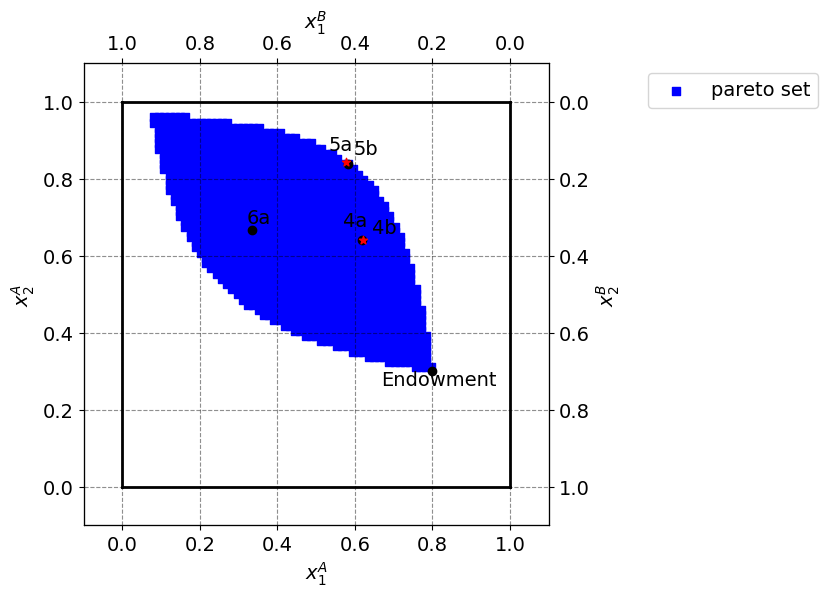

In [77]:
# b. figure set up
fig_1 = plt.figure(frameon=False,figsize=(6,6), dpi=100)
ax_A_1 = fig_1.add_subplot(1, 1, 1)

ax_A_1.set_xlabel("$x_1^A$")
ax_A_1.set_ylabel("$x_2^A$")

temp_1 = ax_A_1.twinx()
temp_1.set_ylabel("$x_2^B$")
ax_B_1 = temp_1.twiny()
ax_B_1.set_xlabel("$x_1^B$")
ax_B_1.invert_xaxis()
ax_B_1.invert_yaxis()

# The pareto optimal set

ax_A_1.scatter(x1a_vec,x2a_vec,marker='s', color='blue', label='pareto set')

# Endowment

ax_A_1.scatter(par.w1A,par.w2A, marker='o',color='black')
ax_A_1.annotate('Endowment', (par.w1A,par.w2A), textcoords="offset points", xytext=(5,-10), ha='center')

# result from 4a

ax_A_1.scatter(x1A_pua, x2A_pua, marker='o', color='black')
ax_A_1.annotate('4a', (x1A_pua,x2A_pua), textcoords="offset points", xytext=(-5,10), ha='center')

# result from 4b

ax_A_1.scatter(x1A_num, x2A_num, marker='*', color='r')
ax_A_1.annotate('4b', (x1A_num,x2A_num), textcoords="offset points", xytext=(15,5), ha='center')

# result from 5a

ax_A_1.scatter(x1a_u, x2a_u, marker='o', color='black')
ax_A_1.annotate('5a', (x1a_u,x2a_u), textcoords="offset points", xytext=(-5,10), ha='center')

# result from 5b

ax_A_1.scatter(result_A.x[0], result_A.x[1], marker='*', color='r')
ax_A_1.annotate('5b', (result_A.x[0],result_A.x[1]), textcoords="offset points", xytext=(15,5), ha='center')

# illustrate allocation in 6a

ax_A_1.scatter(result_planner.x[0], result_planner.x[1], marker='o', color='black')
ax_A_1.annotate('6a', (result_planner.x[0],result_planner.x[1]), textcoords="offset points", xytext=(5,5), ha='center')

# limits
ax_A_1.plot([0,w1bar],[0,0],lw=2,color='black')
ax_A_1.plot([0,w1bar],[w2bar,w2bar],lw=2,color='black')
ax_A_1.plot([0,0],[0,w2bar],lw=2,color='black')
ax_A_1.plot([w1bar,w1bar],[0,w2bar],lw=2,color='black')

ax_A_1.set_xlim([-0.1, w1bar + 0.1])
ax_A_1.set_ylim([-0.1, w2bar + 0.1])    
ax_B_1.set_xlim([w1bar + 0.1, -0.1])
ax_B_1.set_ylim([w2bar + 0.1, -0.1])

ax_A_1.legend(frameon=True,loc='upper right',bbox_to_anchor=(1.6,1.0));

We see that when A is market maker (5a, 5b), A allocates more of the second good to herself compared to taking B's consumption into account (4a, 4b). This complies with A preffering the second good.

When the social planner allocates the goods, the good are more equally allocates between A and B. A still gets more of the second good, whereas B gets more of the first goods. This complies with the prefferences expressed through $\alpha$ and $\beta$.

### 7-8. <a id='toc2_6b_'></a>[A random set](#toc0_)

We draw a set of 50 elements from the uniform distributions of $w_1^{A}$ and $w_2^{A}$. 

In [84]:
np.random.seed(1006)

w1A_vec = np.random.uniform(low=0, high=1, size=50)
w2A_vec = np.random.uniform(low=0, high=1, size=50)

In [85]:
x1A_list =[]
x2A_list =[]

for w1, w2 in zip(w1A_vec, w2A_vec):
    model.find_equilibrium(1.5, 1, w1, w2)

    x1A = model.print_solution()[0]
    x2A = model.print_solution()[1]

    x1A_list.append(x1A)
    x2A_list.append(x2A)




458: p1 =   0.70907281 -> excess demand ->    -0.00000001
Solution to market equilibrium:
p1 = 0.709


The allocations are:
(x1A, x2A) = ((0.6068616208559837, 0.8606181437703829))
(x1B, x2B) = ((0.3931383693269889, 0.13938186319060433))

Solution to market equilibrium:
p1 = 0.709


The allocations are:
(x1A, x2A) = ((0.6068616208559837, 0.8606181437703829))
(x1B, x2B) = ((0.3931383693269889, 0.13938186319060433))

872: p1 =   1.05202536 -> excess demand ->    -0.00000001
The market for good 2 was not cleared
Z2 = 1.048482550780605e-08
Solution to market equilibrium:
p1 = 1.052


The allocations are:
(x1A, x2A) = ((0.30036496058629475, 0.6319831128729562))
(x1B, x2B) = ((0.6996350294473813, 0.36801689761186934))

Solution to market equilibrium:
p1 = 1.052


The allocations are:
(x1A, x2A) = ((0.30036496058629475, 0.6319831128729562))
(x1B, x2B) = ((0.6996350294473813, 0.36801689761186934))

680: p1 =   1.09622304 -> excess demand ->    -0.00000001
The market for good 2 was not cleared
Z

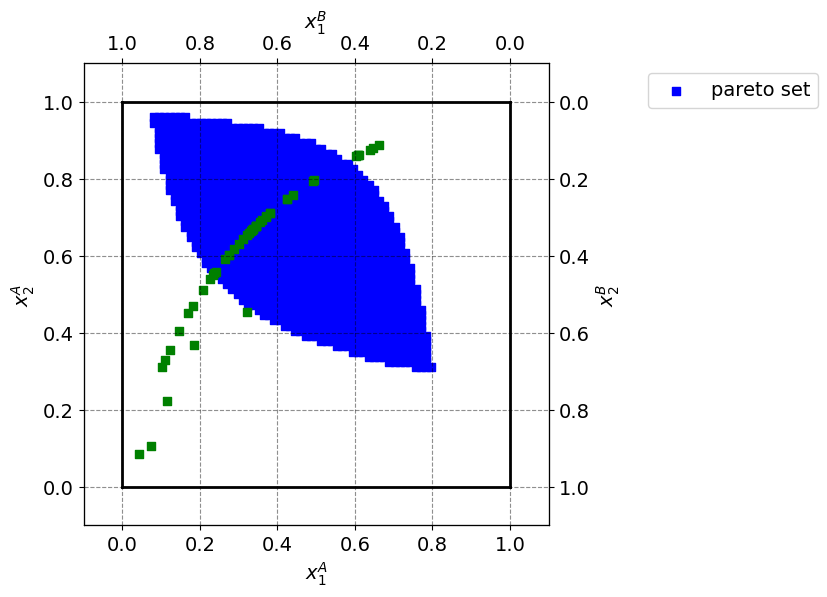

In [87]:
# b. figure set up
fig_2 = plt.figure(frameon=False,figsize=(6,6), dpi=100)
ax_A_2 = fig_2.add_subplot(1, 1, 1)

ax_A_2.set_xlabel("$x_1^A$")
ax_A_2.set_ylabel("$x_2^A$")

temp_2 = ax_A_2.twinx()
temp_2.set_ylabel("$x_2^B$")
ax_B_2 = temp_2.twiny()
ax_B_2.set_xlabel("$x_1^B$")
ax_B_2.invert_xaxis()
ax_B_2.invert_yaxis()

# Add pareto-optiaml point of person A

ax_A_2.scatter(x1a_vec,x2a_vec,marker='s', color='blue', label='pareto set')

# Market equilibrium allocations for different endowments

ax_A_2.scatter(x1A_list, x2A_list, marker='s', color='green')

# limits
ax_A_2.plot([0,w1bar],[0,0],lw=2,color='black')
ax_A_2.plot([0,w1bar],[w2bar,w2bar],lw=2,color='black')
ax_A_2.plot([0,0],[0,w2bar],lw=2,color='black')
ax_A_2.plot([w1bar,w1bar],[0,w2bar],lw=2,color='black')

ax_A_2.set_xlim([-0.1, w1bar + 0.1])
ax_A_2.set_ylim([-0.1, w2bar + 0.1])    
ax_B_2.set_xlim([w1bar + 0.1, -0.1])
ax_B_2.set_ylim([w2bar + 0.1, -0.1])

ax_A_2.legend(frameon=True,loc='upper right',bbox_to_anchor=(1.6,1.0));

We see that some endowments leads to allocations outside the pareto set.